In [1]:
!wget https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip

--2024-09-20 18:35:19--  https://github.com/javierherrera1996/lecture_analytics/raw/main/f1stasts_1.zip
Resolving github.com (github.com)... 140.82.113.3
Connecting to github.com (github.com)|140.82.113.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip [following]
--2024-09-20 18:35:20--  https://raw.githubusercontent.com/javierherrera1996/lecture_analytics/main/f1stasts_1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6183969 (5.9M) [application/zip]
Saving to: ‘f1stasts_1.zip’

f1stasts_1.zip      100%[===================>]   5.90M  --.-KB/s    in 0.1s    

2024-09-20 18:35:20 (60.5 MB/s) - ‘f1stasts_1.zip’ saved [6183969/6183969]



In [2]:
!unzip f1stasts_1.zip

Archive:  f1stasts_1.zip
  inflating: circuits.csv            
  inflating: constructor_results.csv  
  inflating: constructor_standings.csv  
  inflating: constructors.csv        
  inflating: driver_standings.csv    
  inflating: drivers.csv             
  inflating: lap_times.csv           
  inflating: pit_stops.csv           
  inflating: qualifying.csv          
  inflating: races.csv               
  inflating: results.csv             
  inflating: seasons.csv             
  inflating: sprint_results.csv      
  inflating: status.csv              


###1. Cargar los datos en Python
El primer paso es cargar las bases de datos en pandas. Puedes hacerlo utilizando la función pd.read_csv() (o el método adecuado para el formato en el que tengas los datos).



In [3]:
import pandas as pd

circuits_df = pd.read_csv('circuits.csv')

print(circuits_df.head())



   circuitId   circuitRef                            name      location  \
0          1  albert_park  Albert Park Grand Prix Circuit     Melbourne   
1          2       sepang    Sepang International Circuit  Kuala Lumpur   
2          3      bahrain   Bahrain International Circuit        Sakhir   
3          4    catalunya  Circuit de Barcelona-Catalunya      Montmeló   
4          5     istanbul                   Istanbul Park      Istanbul   

     country       lat        lng  alt  \
0  Australia -37.84970  144.96800   10   
1   Malaysia   2.76083  101.73800   18   
2    Bahrain  26.03250   50.51060    7   
3      Spain  41.57000    2.26111  109   
4     Turkey  40.95170   29.40500  130   

                                                 url  
0  http://en.wikipedia.org/wiki/Melbourne_Grand_P...  
1  http://en.wikipedia.org/wiki/Sepang_Internatio...  
2  http://en.wikipedia.org/wiki/Bahrain_Internati...  
3  http://en.wikipedia.org/wiki/Circuit_de_Barcel...  
4         http://en.w

###2. Entender la Estructura de las Bases de Datos
Antes de unir los datasets, los estudiantes deben familiarizarse con las columnas clave. Algunos elementos importantes:

####races_df: Contiene detalles sobre las carreras, como el nombre, fecha y circuito.
####results_df: Contiene información sobre los resultados de las carreras, como la posición final y los puntos.
###drivers_df: Contiene detalles sobre los pilotos, como su nombre y nacionalidad.
Pregunta de negocio:
¿Cuántos pilotos diferentes han participado en carreras de Fórmula 1 desde el comienzo de la base de datos?

In [4]:
drivers_df = pd.read_csv('drivers.csv')

num_pilotos_unicos = drivers_df['driverId'].nunique()

print(f"Número de pilotos diferentes: {num_pilotos_unicos}")

Número de pilotos diferentes: 857


###3. Unir las Bases de Datos
El siguiente paso es unir las bases de datos para tener toda la información disponible en un solo DataFrame. Las claves son:

####raceId en races_df y results_df.
####driverId en results_df y drivers_df.


In [9]:
import pandas as pd
races_df = pd.read_csv('races.csv')
results_df = pd.read_csv('results.csv')

races_results_df = pd.merge(races_df, results_df, on='raceId', how='inner')

merged_df1 = pd.merge(races_results_df, drivers_df, on='driverId', how='inner')

print(merged_df1)

       raceId  year  round  circuitId                   name        date  \
0           1  2009      1          1  Australian Grand Prix  2009-03-29   
1           2  2009      2          2   Malaysian Grand Prix  2009-04-05   
2           3  2009      3         17     Chinese Grand Prix  2009-04-19   
3           4  2009      4          3     Bahrain Grand Prix  2009-04-26   
4           5  2009      5          4     Spanish Grand Prix  2009-05-10   
...       ...   ...    ...        ...                    ...         ...   
26075    1106  2023      8          7    Canadian Grand Prix  2023-06-18   
26076    1107  2023      9         70    Austrian Grand Prix  2023-07-02   
26077    1108  2023     10          9     British Grand Prix  2023-07-09   
26078    1109  2023     11         11   Hungarian Grand Prix  2023-07-23   
26079    1110  2023     12         13     Belgian Grand Prix  2023-07-30   

         time_x                                              url_x  \
0      06:00:00  

Preguntas de negocio:
###¿Cuántos campeonatos se han celebrado desde 1950?
¿Qué circuito ha sido el más utilizado para las carreras de Fórmula 1?

In [10]:

num_campeonatos = races_df[races_df['year'] >= 1950]['year'].nunique()

print(f"Número de campeonatos desde 1950: {num_campeonatos}")


Número de campeonatos desde 1950: 74


In [11]:

circuito_mas_utilizado = races_df['circuitId'].value_counts().idxmax()

print(f"El circuito más utilizado es: {circuito_mas_utilizado}")

nombre_circuito = circuits_df[circuits_df['circuitId'] == circuito_mas_utilizado]['name'].iloc[0]
print(f"Nombre del circuito más utilizado: {nombre_circuito}")


El circuito más utilizado es: 14
Nombre del circuito más utilizado: Autodromo Nazionale di Monza


##4. Generar Indicadores Clave
4.1. Piloto con más victorias
Los estudiantes pueden calcular el piloto con más victorias sumando los resultados donde la posición es 1.

Pregunta de negocio:
###¿Qué piloto ha ganado más carreras en la historia de la Fórmula 1?

In [12]:
winners_df = merged_df1[merged_df1['position'] == '1']
driver_wins = winners_df.groupby('forename')['position'].count().sort_values(ascending=False)
print(f"El piloto con más victorias es: {driver_wins.idxmax()} con {driver_wins.max()} victorias")

El piloto con más victorias es: Lewis con 103 victorias


##4.2. Puntos obtenidos por cada piloto
Otro indicador importante es calcular cuántos puntos ha obtenido cada piloto.

In [16]:

import pandas as pd
merged_df1['points'] = pd.to_numeric(merged_df1['points'], errors='coerce')

puntos_por_piloto = merged_df1.groupby(['driverId', 'forename', 'surname'])['points'].sum().sort_values(ascending=False)

print("Puntos totales obtenidos por cada piloto:")
print(puntos_por_piloto)


Puntos totales obtenidos por cada piloto:
driverId  forename   surname   
1         Lewis      Hamilton      4540.5
20        Sebastian  Vettel        3098.0
830       Max        Verstappen    2275.5
4         Fernando   Alonso        2203.0
8         Kimi       Räikkönen     1873.0
                                    ...  
494       Lloyd      Ruby             0.0
493       Peter      Ryan             0.0
492       Menato     Boffa            0.0
491       Alfonso    Thiele           0.0
858       Logan      Sargeant         0.0
Name: points, Length: 857, dtype: float64


Pregunta de negocio:
##¿Qué piloto ha obtenido más puntos en la historia?


In [18]:

piloto_mas_puntos = puntos_por_piloto.idxmax()
nombre_piloto_mas_puntos = piloto_mas_puntos[1] + " " + piloto_mas_puntos[2]
puntos_maximos = puntos_por_piloto.max()

print(f"El piloto con más puntos en la historia es {nombre_piloto_mas_puntos} con {puntos_maximos} puntos.")


El piloto con más puntos en la historia es Lewis Hamilton con 4540.5 puntos.


###4.3. Comparación de nacionalidades de los pilotos
Los estudiantes pueden analizar la distribución de las nacionalidades de los pilotos para ver qué países han tenido más representación en Fórmula 1.

Pregunta de negocio:
¿Qué nacionalidad es la más representada en la historia de la Fórmula 1?

In [19]:

nacionalidad_mas_representada = drivers_df['nationality'].value_counts().idxmax()

print(f"La nacionalidad más representada en la historia de la Fórmula 1 es: {nacionalidad_mas_representada}")


La nacionalidad más representada en la historia de la Fórmula 1 es: British


###5. Visualización de Indicadores Clave
5.1. Número de carreras por año
Los estudiantes pueden crear un gráfico de barras para visualizar cómo ha evolucionado el número de carreras por año.



Pregunta de negocio:
¿Cómo ha cambiado el número de carreras a lo largo de los años?

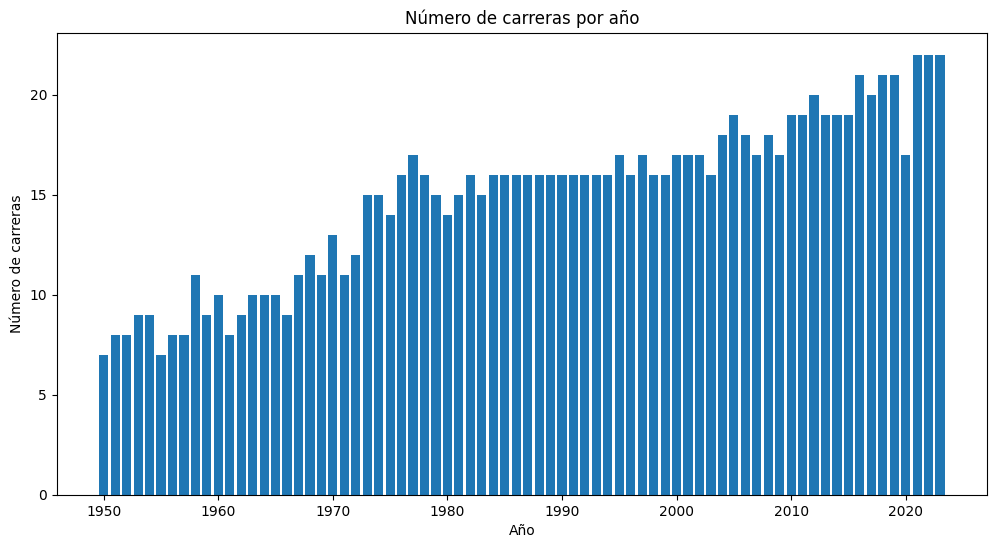

In [21]:
# prompt: ¿Cómo ha cambiado el número de carreras a lo largo de los años? hazlo bien elaborado y bonito

import matplotlib.pyplot as plt
import seaborn as sns

# Contar el número de carreras por año
carreras_por_año = races_df.groupby('year')['raceId'].count()

# Crear el gráfico
plt.figure(figsize=(12, 6))
sns.lineplot(x=carreras_por_año.index, y=carreras_por_año.values)
plt.title('Evolución del Número de Carreras de Fórmula 1 a lo largo de los Años', fontsize=16)
plt.xlabel('Año', fontsize=14)
plt.ylabel('Número de Carreras', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


###5.2. Pilotos con más puntos acumulados
Crear un gráfico de barras para mostrar los 10 pilotos con más puntos acumulados.



Pregunta de negocio:
¿Quiénes son los 10 pilotos con más puntos en la historia de la Fórmula 1?

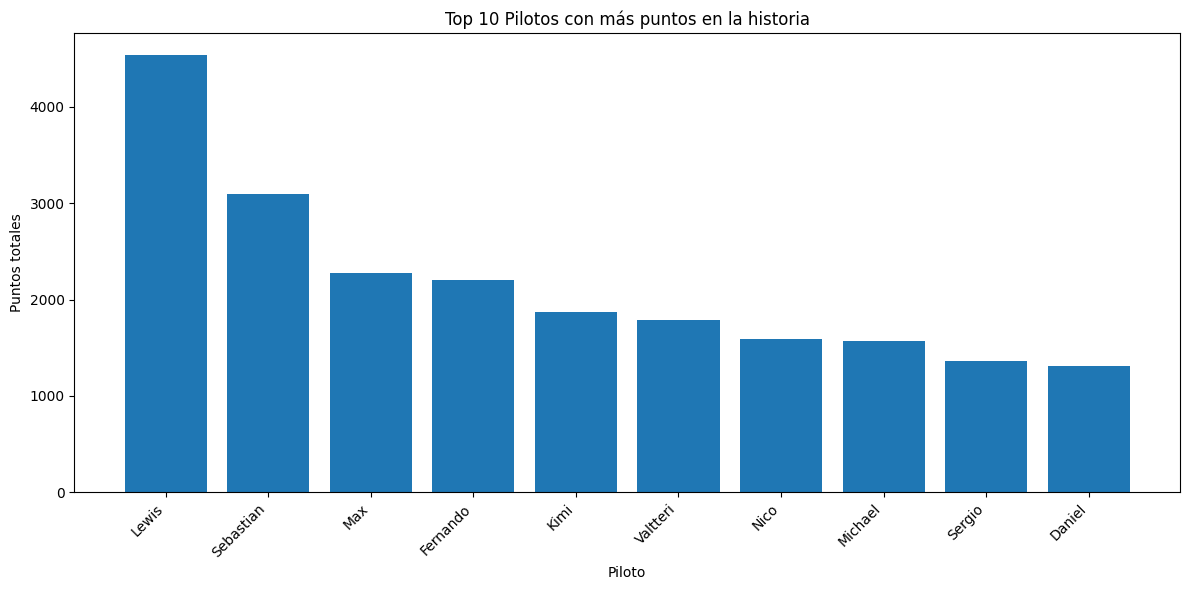

In [22]:
# prompt: ¿Quiénes son los 10 pilotos con más puntos en la historia de la Fórmula 1? hazlo bien bonito creativo y diferente

import matplotlib.pyplot as plt
import seaborn as sns

# Obtener los 10 pilotos con más puntos
top_10_pilotos = puntos_por_piloto.sort_values(ascending=False).head(10)

# Crear el gráfico
plt.figure(figsize=(15, 8))
ax = sns.barplot(x=top_10_pilotos.values, y=top_10_pilotos.index.get_level_values('forename'), palette='viridis')

# Personalizar el gráfico
plt.title('Los 10 Pilotos con Más Puntos en la Historia de la Fórmula 1', fontsize=20, fontweight='bold')
plt.xlabel('Puntos Acumulados', fontsize=16)
plt.ylabel('Piloto', fontsize=16)

# Agregar etiquetas a las barras
for p in ax.patches:
  width = p.get_width()
  plt.text(width + 10, p.get_y() + p.get_height() / 2, int(width), ha='left', va='center', fontsize=12, fontweight='bold')


# Ajustar el diseño
plt.tight_layout()
plt.show()


5.3. Distribución de nacionalidades de los pilotos
Usa un gráfico de pastel para mostrar la distribución de nacionalidades entre los pilotos.



Pregunta de negocio:
¿Qué porcentaje de pilotos en la Fórmula 1 provienen de los principales países?

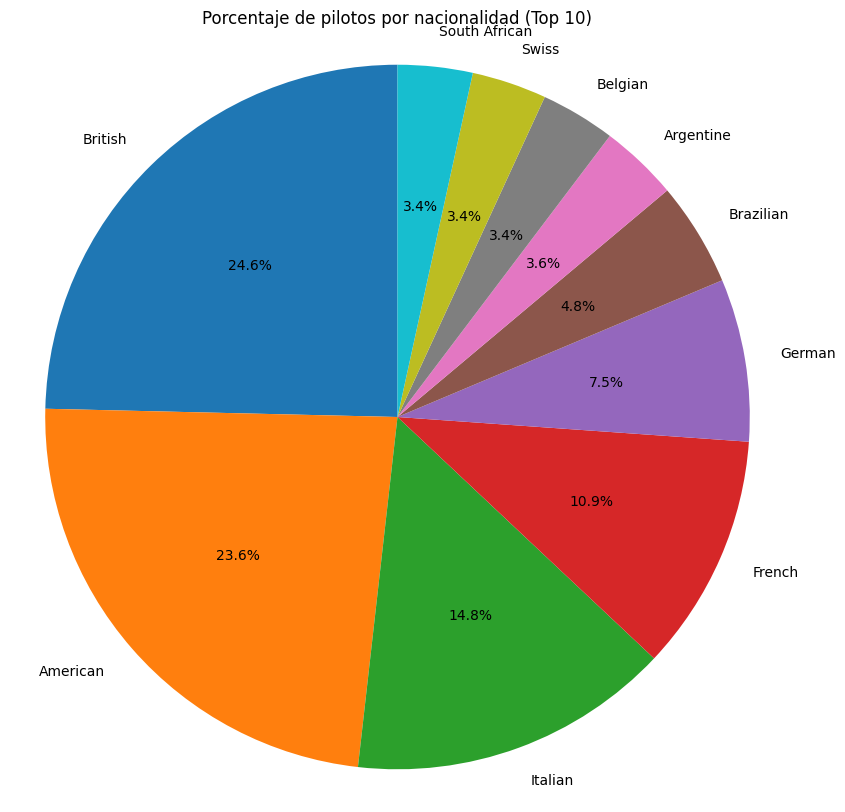

In [26]:

import matplotlib.pyplot as plt
nationality_counts = drivers_df['nationality'].value_counts(normalize=True) * 100

top_10_nationalities = nationality_counts.head(10)

plt.figure(figsize=(10, 10))
plt.pie(top_10_nationalities, labels=top_10_nationalities.index, autopct='%1.1f%%', startangle=90)
plt.title('Porcentaje de pilotos por nacionalidad (Top 10)')
plt.axis('equal')
plt.show()


###5.4. Evolución de los puntos por temporada
Crea una línea temporal para ver cómo han evolucionado los puntos por temporada.

Pregunta de negocio:
¿Cómo ha variado la cantidad de puntos obtenidos en cada temporada?

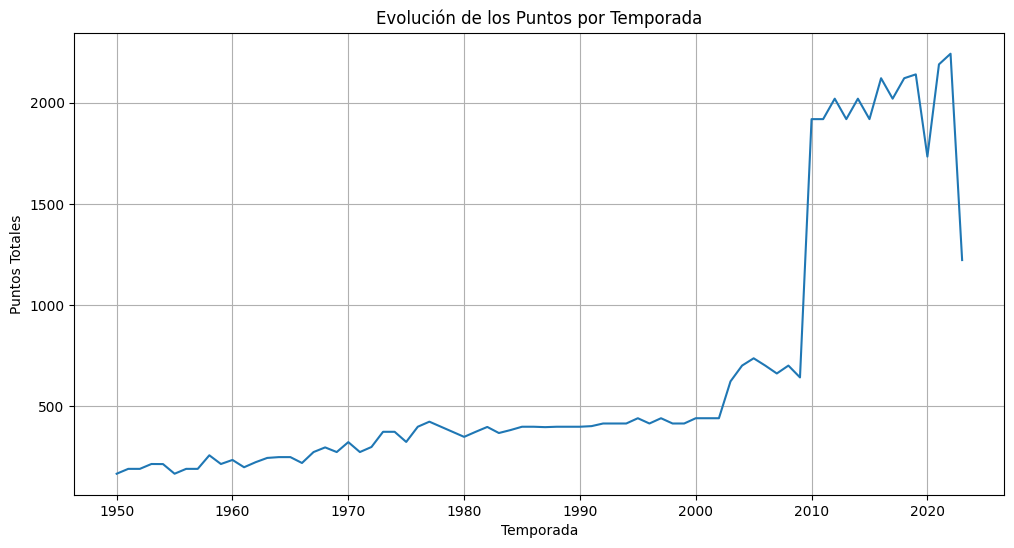

In [25]:

import matplotlib.pyplot as plt
puntos_por_temporada = merged_df1.groupby(['year'])['points'].sum()

plt.figure(figsize=(12, 6))
plt.plot(puntos_por_temporada.index, puntos_por_temporada.values)
plt.xlabel('Temporada')
plt.ylabel('Puntos Totales')
plt.title('Evolución de los Puntos por Temporada')
plt.grid(True)
plt.show()
